# DSC440 Data Mining - Final Project
# Jingwen Zhong & Charlotte Ding

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots 
from plotly.offline import init_notebook_mode, iplot
import re

In [2]:
from google.colab import files
uploaded = files.upload()

## Data cleaning

In [3]:
BA = pd.read_csv("BusinessAnalyst.csv")
# BA.info()

In [4]:
DA = pd.read_csv("DataAnalyst.csv")
# DA.info()

In [5]:
DE = pd.read_csv("DataEngineer.csv")
# DE.info() ## No unnamed column

In [6]:
DS = pd.read_csv("DataScientist.csv")
# DS.info()

In [7]:
a= 0 
for i in BA['Unnamed: 0']:
  if not i.isdigit():
    BA.drop(index=(BA.loc[(BA['Unnamed: 0']==i)].index), axis=0,inplace=True)

BA.drop(['Unnamed: 0','index'],axis=1,inplace=True)


BA['Job Title'],BA['Department']= BA['Job Title'].str.split(',',1).str
# BA['Company Name'],_ = BA['Company Name'].str.split('\n',1).str
# BA['Salary Estimate'],_= BA['Salary Estimate'].str.split('(',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [8]:
# Delete unnamed column
DA.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Separate values 
DA['Job Title'],DA['Department']= DA['Job Title'].str.split(',',1).str
# DA['Company Name'],_ = DA['Company Name'].str.split('\n',1).str
# DA['Salary Estimate'],_= DA['Salary Estimate'].str.split('(',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [9]:
# Separate values
DE['Job Title'],DE['Department']= DE['Job Title'].str.split(',',1).str
# DE['Company Name'],_ = DE['Company Name'].str.split('\n',1).str
# DE['Salary Estimate'],_= DE['Salary Estimate'].str.split('(',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [10]:
# Delete unnamed column
DS.drop(['Unnamed: 0', 'index'], axis = 1, inplace = True)

# Separate values
DS['Job Title'],DS['Department']= DS['Job Title'].str.split(',',1).str
# DS['Company Name'],_ = DS['Company Name'].str.split('\n',1).str
# DS['Salary Estimate'],_= DS['Salary Estimate'].str.split('(',1).str

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [11]:
BA.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,NaN
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,NaN
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,NaN


In [12]:
DA.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ)
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations]


In [13]:
DE.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,NaN
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,NaN
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,NaN


In [14]:
DS.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,NaN
1,Data Scientist,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,Product Analytics
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True,NaN


## Data Visualization

### Seperated dataset

In [15]:
import nltk # Natural Language toolkit
nltk.download("stopwords")  #downloading stopwords
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
from sklearn.feature_extraction.text import CountVectorizer #Bag of Words
from wordcloud import WordCloud, STOPWORDS

max_features=500 # "number" most common(used) words in reviews
count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") # stop words will be dropped by stopwords command

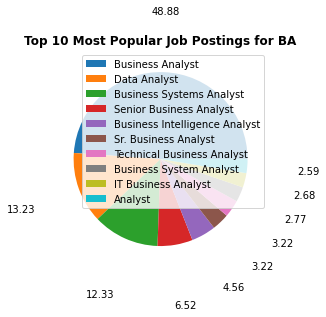

In [17]:
top10_job_titles= BA['Job Title'].value_counts().sort_values(ascending = False).head(10)
plt.pie(top10_job_titles, autopct='%.2f',pctdistance=1.7)
plt.title('Top 10 Most Popular Job Postings for BA',fontweight ='bold')
plt.legend(list(dict(top10_job_titles).keys()), loc='upper right')
plt.show()

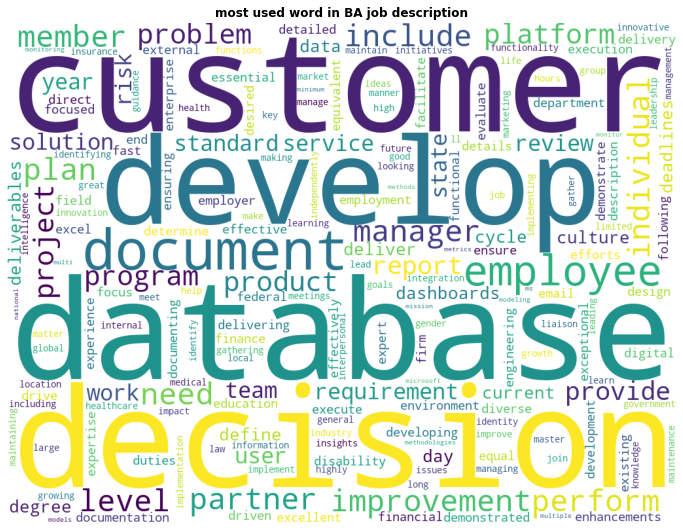

In [18]:
sparce_matrix1=count_vectorizer.fit_transform(BA['Job Description']).toarray()# this code will create matrix that consist of 0 and 1.
BA_word = pd.DataFrame(count_vectorizer.get_feature_names(), columns=["Words"])
plt.subplots(figsize=(12,12))
wordcloud = WordCloud(background_color="white",width=1024,height=768).generate(" ".join(BA_word.Words[100:]))
plt.imshow(wordcloud)
plt.title('most used word in BA job description',fontweight ='bold')
plt.axis("off")
plt.show()
# print("Top {} the most used word in business analyst job description: {}".format(max_features,count_vectorizer.get_feature_names()))

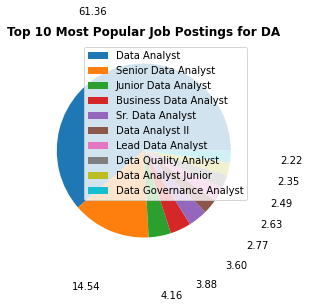

In [19]:
top10_job_titles= DA['Job Title'].value_counts().sort_values(ascending = False).head(10)
plt.pie(top10_job_titles, autopct='%.2f',pctdistance=1.7)
plt.title('Top 10 Most Popular Job Postings for DA',fontweight ='bold')
plt.legend(list(dict(top10_job_titles).keys()), loc='upper right')
plt.show()

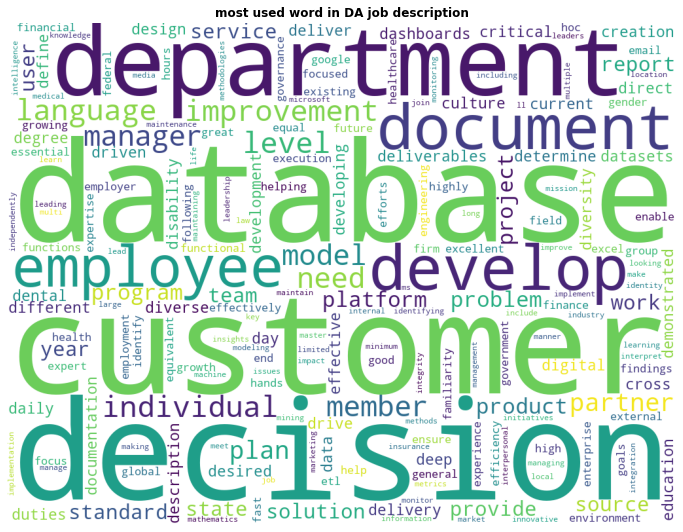

In [20]:
sparce_matrix2 = count_vectorizer.fit_transform(DA['Job Description']).toarray()# this code will create matrix that consist of 0 and 1.
DA_word = pd.DataFrame(count_vectorizer.get_feature_names(), columns=["Words"])
wordcloud2 = WordCloud(background_color = "white",width=1024,height=768).generate(" ".join(DA_word.Words[100:]))
plt.subplots(figsize=(12,12))
plt.title('most used word in DA job description',fontweight ='bold')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

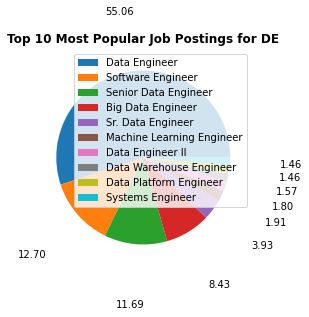

In [21]:
top10_job_titles= DE['Job Title'].value_counts().sort_values(ascending = False).head(10)
plt.pie(top10_job_titles, autopct='%.2f',pctdistance=1.7)
plt.title('Top 10 Most Popular Job Postings for DE',fontweight ='bold')
plt.legend(list(dict(top10_job_titles).keys()), loc='upper right')
plt.show()

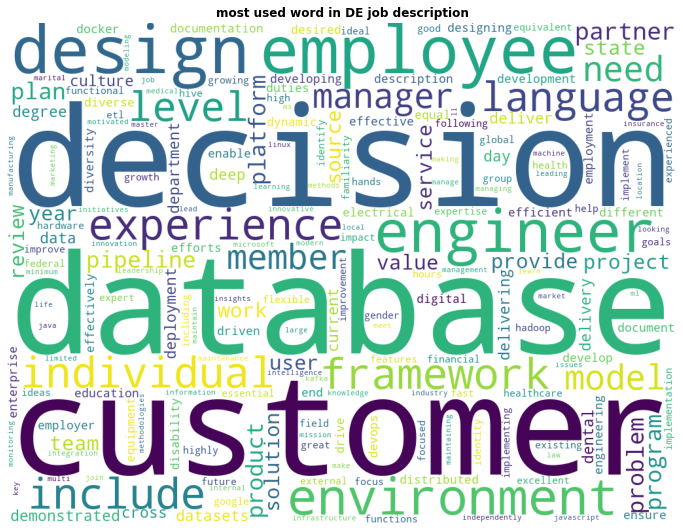

In [22]:
sparce_matrix3 = count_vectorizer.fit_transform(DE['Job Description']).toarray()# this code will create matrix that consist of 0 and 1.
DE_word = pd.DataFrame(count_vectorizer.get_feature_names(), columns=["Words"])
wordcloud3 = WordCloud(background_color = "white",width=1024,height=768).generate(" ".join(DE_word.Words[100:]))
plt.subplots(figsize=(12,12))
plt.imshow(wordcloud3)
plt.title('most used word in DE job description',fontweight ='bold')
plt.axis("off")
plt.show()

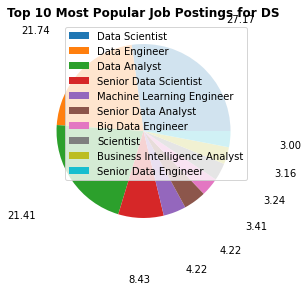

In [23]:
top10_job_titles= DS['Job Title'].value_counts().sort_values(ascending = False).head(10)
plt.pie(top10_job_titles, autopct='%.2f',pctdistance=1.7)
plt.title('Top 10 Most Popular Job Postings for DS',fontweight ='bold')
plt.legend(list(dict(top10_job_titles).keys()), loc='upper right')
plt.show()

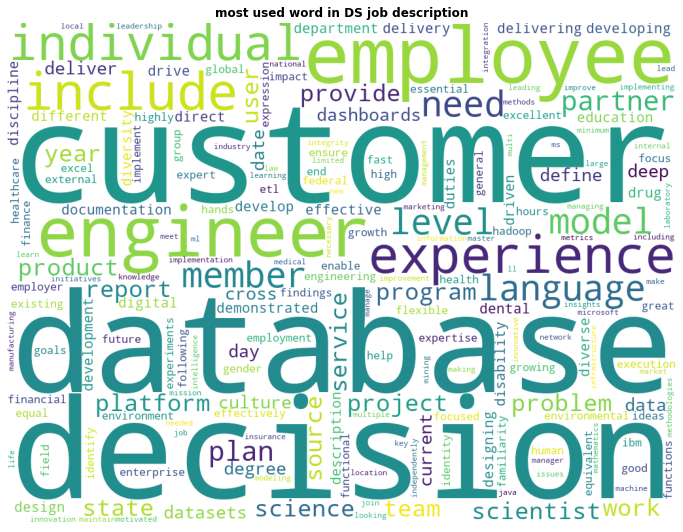

In [24]:
sparce_matrix4 = count_vectorizer.fit_transform(DS['Job Description']).toarray()# this code will create matrix that consist of 0 and 1.
DS_word = pd.DataFrame(count_vectorizer.get_feature_names(), columns=["Words"])
wordcloud4 = WordCloud(background_color = "white",width=1024,height=768).generate(" ".join(DS_word.Words[100:]))
plt.subplots(figsize=(12,12))
plt.imshow(wordcloud4)
plt.title('most used word in DS job description',fontweight ='bold')
plt.axis("off")
plt.show()

In [25]:
import re
# A dictionary is created with a list of hard skills to search in the job description fields
hard_skills_dict = {
    'Python': r"python",
    'R': r"[\b\s/]r[\s,\.]",
    'Excel': r"excel",
    'SQL': r"sql",
    'NoSQL': r"\bNo[\s,-]sql[\s]",
    'PowerBI': r"power[\s]BI",
    'Tableau': r"tableau",
    'SPSS': r'\bSPSS\b',
    'Big Data': r"\sbig\sdata\s",
    'SAP BI': r"SAP[\s]BI",
    'MongoDB': r"MongoDB",
    'Hadoop': r"Hadoop",
    'SAS': r"\bSAS\b",
    'VBA': r"\bvba\b",
    'AWS': r"\baws\b",
    'Git': r"\bGit",
    'QlikView': r"\bQlikView",
    'Oracle BI': r"oracle[\n]BI",
    'Scala': r"Scala",
    'Dashboard': r"\bDashboard[s]",
    'Spark': r"Spark",
    'Matlab': r"Matplotlib",
    'Linux': r"linux",
    'Unix': r"unix",
    'Looker': r"looker",
    'C# or C++': r"\bC[#\+\+]",
    'Java': r"java",
    'PowerPivot': r"Power[\s]Pivot",
    'PowerQuery': r"Power[\s]Query",
    'BigQuery': r"Big[\s]Query",
    'Apache Cassandra': r"[\b\s]Cassandra[\b\s]",
    'Neo4j': r"Neo4j",
    'TensorFlow': r"TensorFlow"
}
hard_skills_count = {}



In [26]:
## BA
# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = BA['Job Description'].str.contains(search, flags = re.IGNORECASE).sum()

BA_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

BA_skills['Relative Frequency'] = (BA_skills['Count'] / sum(BA_skills['Count'])) *100
BA_skills['Relative Frequency'] = BA_skills['Relative Frequency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
BA_skills = BA_skills.drop(BA_skills[BA_skills['Relative Frequency'] < 1.00].index, axis = 0)

BA_chart_skills = px.bar(BA_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frequency',
                     labels = {'Skills': 'Hard Skills of BA','Count': 'Number of Requests'})
BA_chart_skills.show()
# Business related job requires Excel (office) skills.

In [27]:
## DA
# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = DA['Job Description'].str.contains(search, flags = re.IGNORECASE).sum()

DA_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

DA_skills['Relative Frequency'] = (DA_skills['Count'] / sum(DA_skills['Count'])) *100
DA_skills['Relative Frequency'] = DA_skills['Relative Frequency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
DA_skills = DA_skills.drop(DA_skills[DA_skills['Relative Frequency'] < 1.00].index, axis = 0)

DA_chart_skills = px.bar(DA_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frequency',
                     labels = {'Skills': 'Hard Skills of DA','Count': 'Number of Requests'})
DA_chart_skills.show()

In [28]:
## DE
# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = DE['Job Description'].str.contains(search, flags = re.IGNORECASE).sum()

DE_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

DE_skills['Relative Frequency'] = (DE_skills['Count'] / sum(DE_skills['Count'])) *100
DE_skills['Relative Frequency'] = DE_skills['Relative Frequency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
DE_skills = DE_skills.drop(DE_skills[DE_skills['Relative Frequency'] < 1.00].index, axis = 0)

DE_chart_skills = px.bar(DE_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frequency',
                     labels = {'Skills': 'Hard Skills of DE','Count': 'Number of Requests'})
DE_chart_skills.show()

In [29]:
## DATA SCIENCE
# Loop through skills for count the frecuency in Jobs Description Field.
for key, search in hard_skills_dict.items():
    hard_skills_count[key] = DS['Job Description'].str.contains(search, flags = re.IGNORECASE).sum()

DS_skills = pd.DataFrame.from_dict(hard_skills_count, orient = 'index') \
                        .sort_values(0, ascending = False) \
                        .reset_index() \
                        .rename(columns = {'index': 'Skills', 0: 'Count'})

DS_skills['Relative Frequency'] = (DS_skills['Count'] / sum(DS_skills['Count'])) *100
DS_skills['Relative Frequency'] = DS_skills['Relative Frequency'].apply(lambda x: round(x, 2))

# Remove values less than '1' per cent in its Relative Frequency
DS_skills = DS_skills.drop(DS_skills[DS_skills['Relative Frequency'] < 1.00].index, axis = 0)

DS_chart_skills = px.bar(DS_skills, x = 'Skills', y = 'Count',
                     color = 'Relative Frequency',
                     labels = {'Skills': 'Hard Skills of DS','Count': 'Number of Requests'})
DS_chart_skills.show()

#### Combined dataset

In [30]:
# Append the original job types
# 1 as BA, 2 as DA, 3 as DE, 4 as DS


Type1 = []
for i in range(len(BA)):
  Type1.append('BA')
BA.insert(1,'label', Type1)


Type2 = []
for i in range(len(DA)):
  Type2.append('DA')

DA.insert(1,'label', Type2)


Type3 = []
for i in range(len(DE)):
  Type3.append('DE')

DE.insert(1,'label', Type3)


Type4 = []
for i in range(len(DS)):
  Type4.append('DS')

DS.insert(1,'label', Type4)


In [31]:
# merge dataset
frames=[BA, DA, DE, DS]
data = pd.concat(frames)

In [32]:
# data.isnull().sum()
## 有null但不在interested的column
# data =  pd.read_excel("combined.xlsx")

In [33]:
pattern = re.compile(r'(\d.*?)\D')
def format_salary(string):
    try:
        result = re.search(pattern, string).group(1)
    except:
        return 0
    return int(result)
data['Salary Estimate'] = data['Salary Estimate'].map(format_salary)
## Salary取min（因为一般如果给一个range 其实真的给到手都是min （手动狗头

In [34]:
# fig, ax = plt.subplots(figsize = [20, 7])
# sns.histplot(data, x = "Salary Estimate", kde = True, hue = "label", fill = True, ax = ax)
# plt.show()

In [35]:
## 看salary小于10的
# data[data["Salary Estimate"] < 10]
## 没有job description和rating 不可用所以删除
## delete
data = data[data["Salary Estimate"] > 10]

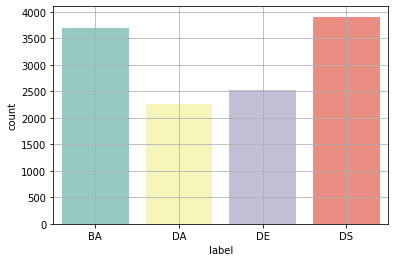

In [36]:
## 剩下的数据个数
data.label.value_counts()
sns.countplot(x = "label", data = data, palette = "Set3")
plt.grid()
plt.show()
## DA & DE少很多

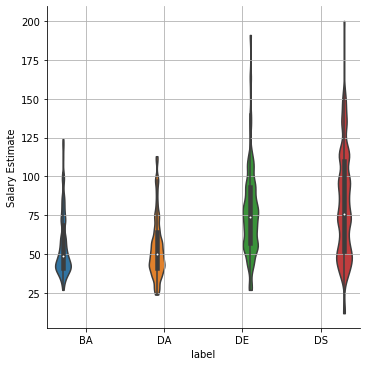

In [37]:
sns.catplot(x = "label", y = "Salary Estimate", hue = "label", bw = 0.15, cut = 0,
            kind = "violin", data = data)
plt.grid()
plt.show()
## DS和DE的工资起薪还是比BA和DA高一点

In [38]:
## 搞rating数据
# def format_rating(string):
#    try:
#        result = float(string)
#    except:
#        return 0
#    return result
# data['Rating'] = data['Rating'].map(format_rating)

In [39]:
# sns.catplot(x = "label", y = "Rating", hue = "label", kind = "box", data = data)
# plt.grid()
# plt.show()
## 得分和职业无关 所以不放进model

In [40]:
pattern = r'\W' ## 匹配所有字符串数字下划线
data[['Job Title','Job Description']] = data[['Job Title','Job Description']].applymap(lambda x:re.sub(pattern,' ',x))
## 所有非字母数字下划线字符 替换为空格
data[['Job Title','Job Description']] = data[['Job Title','Job Description']].applymap(lambda x:x.lower())

In [41]:
data.head()

,Job Title,label,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Department
0,business analyst clinical logistics platform,BA,56,company overview at memorial sloan kettering...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,NaN
1,business analyst,BA,56,we are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,NaN
2,data analyst,BA,56,for more than a decade asembia has been worki...,3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,NaN
3,information security analyst,BA,56,job description summary the information securi...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,Incident Response
4,analyst fp a global revenue,BA,56,magnite is the world s largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,NaN


#Model

### Training preparation



In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss,precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve

#### Word to Vector

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [44]:
# np.random.seed(20)

rate = [0.7, 0.5]
## 训练集占总sample size的70% 测试集占剩余的50% 剩下为验证集
## N*0.7 / N*(1-0.7)*0.5

In [45]:
def get_train_test_val(data, rate):
    data = data.loc[:, ['Job Title', 'Salary Estimate', 'Job Description', 'label']]
    train = data.sample(frac = rate[0])#按比例抽取训练集
    data = data[~data.index.isin(train.index)]
    test = data.sample(frac = rate[1])
    val = data[~data.index.isin(test.index)]
    return train, test, val

In [46]:
train, test, val = get_train_test_val(data, rate)

In [47]:
x_tokenizer = Tokenizer(lower = True, char_level = False, oov_token = '<UNK>')
## 未知的单词设置为'<UNK>'

In [48]:
vocab = train.loc[:, ['Job Title', 'Job Description']].apply(lambda x:' '.join(x),axis=1)
vocab = vocab.map(lambda x:re.sub('\s+',' ',x))## 多个空格换成一个空格
vocab

1126    microsoft analytics consultant introduction as...
1629    data analyst 6777722 silicon valley bank banki...
980     sales engineer company overview conveyor solut...
2141    data engineer job description location round r...
128     business analyst creates and manages sdlc docu...
                              ...                        
1949    jr business analyst job description job descri...
1243    client operations analyst this position plays ...
3185    data engineer ng 014 data engineer san jose ca...
3627    data engineer guidewire data hub data engineer...
1782    data statistics analyst pfk care coordination ...
Length: 8665, dtype: object

In [49]:
x_tokenizer.fit_on_texts(vocab)
vocab_size = len(x_tokenizer.word_index) + 1
print (f"# tokens: {vocab_size}")

# tokens: 39747


In [50]:
def word_to_vector(data):
    data['Job Title'] = x_tokenizer.texts_to_sequences(data['Job Title'])
    data['Job Description'] = x_tokenizer.texts_to_sequences(data['Job Description'])
    return data

In [51]:
train = word_to_vector(train)
test = word_to_vector(test)
val = word_to_vector(val)
train.head()
## 看一下转换后的数据

,Job Title,Salary Estimate,Job Description,label
1126,"[268, 60, 1010]",36,"[2990, 15, 27, 689, 1010, 19, 643, 114, 155, 7...",DS
1629,"[6, 32]",34,"[20168, 3244, 3623, 1055, 880, 744, 130, 6, 32...",BA
980,"[284, 86]",70,"[64, 1014, 12112, 45, 186, 556, 8, 666, 7, 4, ...",DE
2141,"[6, 86]",67,"[46, 144, 236, 4170, 3417, 523, 986, 1291, 806...",DE
128,"[13, 32]",45,"[1134, 2, 1242, 1545, 253, 2, 7838, 9804, 48, ...",BA


In [52]:
def decode(indices, tokenizer):
    ## 把数字向量转文本   
    return " ".join([tokenizer.index_word[index] for index in indices])
decode(train.iloc[0,0], x_tokenizer)
## 拿job title第一行试试

'microsoft analytics consultant'

In [53]:
## 因为四个数据样本量不一样 设置类别权重 样本少的权重相应提高 样本多的权重减少
classWeights = 1 / train.label.value_counts() * 1000
classWeights

DS    0.362319
BA    0.384025
DE    0.573723
DA    0.641849
Name: label, dtype: float64

In [54]:
diclabel = {k:v for v,k in enumerate(classWeights.index)}
##类别字典

In [55]:
train.label = train.label.map(diclabel)
train.head()

,Job Title,Salary Estimate,Job Description,label
1126,"[268, 60, 1010]",36,"[2990, 15, 27, 689, 1010, 19, 643, 114, 155, 7...",0
1629,"[6, 32]",34,"[20168, 3244, 3623, 1055, 880, 744, 130, 6, 32...",1
980,"[284, 86]",70,"[64, 1014, 12112, 45, 186, 556, 8, 666, 7, 4, ...",2
2141,"[6, 86]",67,"[46, 144, 236, 4170, 3417, 523, 986, 1291, 806...",2
128,"[13, 32]",45,"[1134, 2, 1242, 1545, 253, 2, 7838, 9804, 48, ...",1


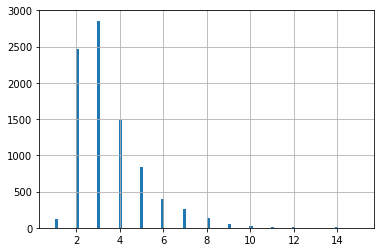

In [56]:
train['Job Title'].map(len).hist(bins = 100)

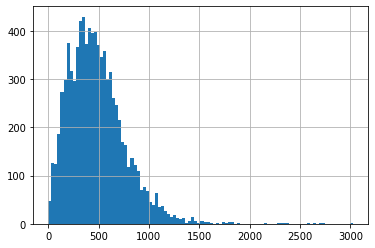

In [57]:
train['Job Description'].map(len).hist(bins = 100)

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
## 把vector补齐到一样的长度 jobTitle不足10的用0填充
## jobDescription填充到1500

def padding(data): ## 补齐
    data['Job Title'] = data['Job Title'].map(lambda x:pad_sequences([x], padding = "post", maxlen = 10))
    data['Job Description'] = data['Job Description'].map(lambda x:pad_sequences([x], padding = "post", maxlen = 1500))
    return data

train = padding(train)
train.head()

,Job Title,Salary Estimate,Job Description,label
1126,"[[268, 60, 1010, 0, 0, 0, 0, 0, 0, 0]]",36,"[[2990, 15, 27, 689, 1010, 19, 643, 114, 155, ...",0
1629,"[[6, 32, 0, 0, 0, 0, 0, 0, 0, 0]]",34,"[[20168, 3244, 3623, 1055, 880, 744, 130, 6, 3...",1
980,"[[284, 86, 0, 0, 0, 0, 0, 0, 0, 0]]",70,"[[64, 1014, 12112, 45, 186, 556, 8, 666, 7, 4,...",2
2141,"[[6, 86, 0, 0, 0, 0, 0, 0, 0, 0]]",67,"[[46, 144, 236, 4170, 3417, 523, 986, 1291, 80...",2
128,"[[13, 32, 0, 0, 0, 0, 0, 0, 0, 0]]",45,"[[1134, 2, 1242, 1545, 253, 2, 7838, 9804, 48,...",1


In [60]:
## JobTitle, Salary, jobDescription分别作为model的三个不同输入 一起打包
def get_db(data):
    title = np.concatenate(data['Job Title'].values)
    salary = data['Salary Estimate'].values.reshape(-1,1)
    desc = np.concatenate(data['Job Description'].values)
    feature = [tf.cast(x,dtype=tf.float32) for x in [title,salary,desc]]
    label = tf.cast(data.label,dtype=tf.float32)
    return feature, label

In [61]:
train_x, train_y = get_db(train)

### Training

In [62]:
## model

title_input = tf.keras.Input(shape = [10], name = 'title')
title_embedding = tf.keras.layers.Embedding(vocab_size, 64)(title_input)
## FutureWork - 64可以改32
## 把一个word再次扩展 超越现有的维度 在3D的角度看2D的数据
title_lstm = tf.keras.layers.LSTM(32)(title_embedding)
title_output = tf.keras.layers.Dense(4, activation='softmax')(title_lstm)
## 4可以试别的


salary_input = tf.keras.Input(shape=[1], name = 'salary')
salary_dense = tf.keras.layers.Dense(10, activation = 'relu')(salary_input)
## 10可以改
salary_output = tf.keras.layers.Dense(4, activation = 'softmax')(salary_dense)
## 4可以改

desc_input = tf.keras.Input(shape=[1500], name = 'desc')
desc_embedding = tf.keras.layers.Embedding(vocab_size, 64)(desc_input)
desc_lstm = tf.keras.layers.LSTM(32)(desc_embedding)
desc_output = tf.keras.layers.Dense(4,activation = 'softmax')(desc_lstm)

concatenated = tf.keras.layers.concatenate([title_output, salary_output, desc_output], axis=-1)

output = tf.keras.layers.Dense(4, activation = 'softmax')(concatenated)

model = tf.keras.Model(inputs = [title_input, salary_input, desc_input], outputs = output)

In [63]:
## tf.keras.utils.plot_model(model, show_layer_names = True, show_shapes = True)

In [64]:
## optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['acc'])

In [65]:
def preprocess_data(data):
  data.label = data.label.map(diclabel)
  data = padding(data)
  feature, label = get_db(data)
  return feature,label
test_x ,test_y = preprocess_data(test)

In [66]:
## 开始train
history = model.fit(train_x, train_y,
          epochs = 20,## Future Work 可以改次数
          batch_size = 64, ##
          validation_data = (test_x,test_y),
          class_weight = {k:v for k,v in zip(range(4),classWeights.values)})

Epoch 1/20
136/136 [==============================] - 121s 892ms/step - loss: 0.6011 - acc: 0.4118 - val_loss: 1.2108 - val_acc: 0.4286
Epoch 2/20
136/136 [==============================] - 125s 921ms/step - loss: 0.4891 - acc: 0.6409 - val_loss: 1.0374 - val_acc: 0.7692
Epoch 3/20
136/136 [==============================] - 125s 916ms/step - loss: 0.4343 - acc: 0.6339 - val_loss: 0.9770 - val_acc: 0.4341
Epoch 4/20
136/136 [==============================] - 126s 929ms/step - loss: 0.4046 - acc: 0.6344 - val_loss: 0.9480 - val_acc: 0.4341
Epoch 5/20
136/136 [==============================] - 127s 932ms/step - loss: 0.3820 - acc: 0.6364 - val_loss: 0.9009 - val_acc: 0.4451
Epoch 6/20
136/136 [==============================] - 127s 931ms/step - loss: 0.3654 - acc: 0.6389 - val_loss: 0.8927 - val_acc: 0.4341
Epoch 7/20
136/136 [==============================] - 128s 941ms/step - loss: 0.3531 - acc: 0.6404 - val_loss: 0.8851 - val_acc: 0.4396
Epoch 8/20
136/136 [============================

In [67]:
his = pd.DataFrame(history.history)

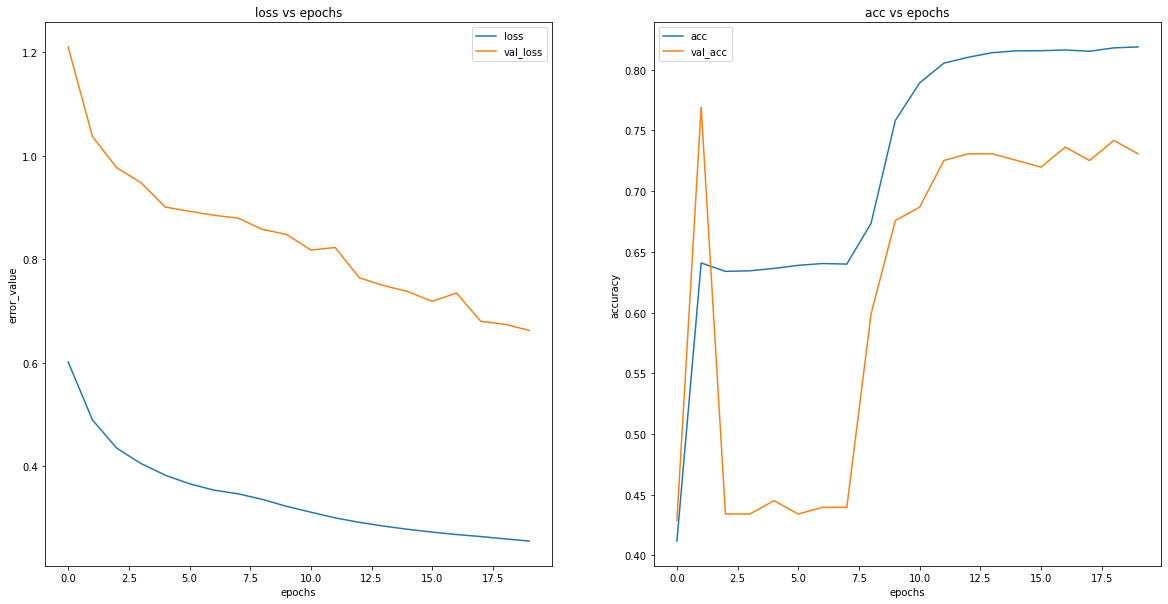

In [68]:
fig,ax = plt.subplots(1, 2, figsize= (20,10))
ax[0].plot(history.epoch, 'loss', data = his, label = 'loss')
ax[0].plot(history.epoch, 'val_loss', data = his, label = 'val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('error_value')
ax[0].set_title('loss vs epochs')
ax[0].legend()

ax[1].plot(history.epoch, 'acc',data = his,label = 'acc')
ax[1].plot(history.epoch, 'val_acc',data = his,label = 'val_acc')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_title('acc vs epochs')
ax[1].legend()
plt.show()

In [69]:
## validation
val_x, val_y = preprocess_data(val)

In [70]:
pred = tf.argmax(model.predict(val_x), axis = 1)

In [71]:
confusion_matrix(val_y, pred, labels = [0,1,2,3])

array([[31,  0, 17, 13],
       [ 0, 26,  0,  2],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  0]])

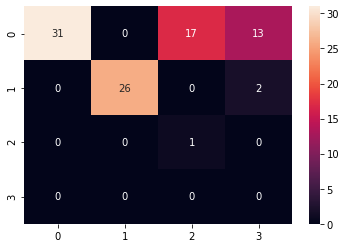

In [72]:
sns.heatmap(confusion_matrix(val_y, pred,labels = [0,1,2,3]), annot=True, fmt='.3g')
plt.show()

In [74]:
model.evaluate(val_x, val_y)

3/3 [==============================] - 0s 86ms/step - loss: 0.7426 - acc: 0.6444


[0.7426151037216187, 0.644444465637207]